In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [39]:
import csv

file1_path = './texttest1.txt'
file2_path = './texttest1_label.txt'
output_file_path = '_train.csv'

dat = {'text': [], 'sentiment': []}

# อ่านข้อมูลจากไฟล์1
with open(file1_path, 'r', encoding='utf-8') as file1:
    data1 = file1.readlines()
    dat['text'] = [line.strip() for line in data1]

# อ่านข้อมูลจากไฟล์2
with open(file2_path, 'r', encoding='utf-8') as file2:
    data2 = file2.readlines()
    dat['sentiment'] = [line.strip() for line in data2]

with open(output_file_path, 'w', newline='', encoding='utf-8-sig') as csv_file:
    csv_writer = csv.writer(csv_file)

    # เขียนหัวข้อคอลัมน์
    # csv_writer.writerow(["sentiment", "text"])

    # เขียนข้อมูลลงในไฟล์ CSV
    for sentiment, text in zip(dat['sentiment'], dat['text']):
        sentiment = sentiment.strip()
        text = text.strip()

        # ข้ามหากค่า "q" ในทั้งสองไฟล์
        if sentiment == "q" or text == "q":
            continue

        # ข้าม index ที่มีค่า "q" ในไฟล์ "train_label.txt"
        if sentiment == "train" and text == "q":
            continue

        csv_writer.writerow([sentiment, text])

# df = pd.read_csv(output_file_path, names=['category', 'texts'], header=None, encoding='utf-8-sig')
# df
# df = pd.read_csv('convert.csv', names=['texts', 'category'], header=None)
# สร้างคำสั่งแมปเพื่อแปลงค่า label เป็นตัวเลขตามที่ต้องการ
label_mapping = {'neu': 1, 'neg': 0, 'pos': 2}

# อ่านไฟล์ CSV และใช้ฟังก์ชันแมปเพื่อแปลงค่า label
df = pd.read_csv('_train.csv', names=['category', 'texts'], header=None)
df['category'] = df['category'].map(label_mapping)
df

,category,texts
0,1,☹️
1,0,😔
2,0,😞
3,0,😥
4,0,รำ
...,...,...
4495,2,หิววววววว555555
4496,2,ให้เพื่อนรับรู้
4497,2,อยากกิงบัฟเฟ่ต์
4498,2,อยากกิน เอ็มเค.


<Axes: xlabel='category'>

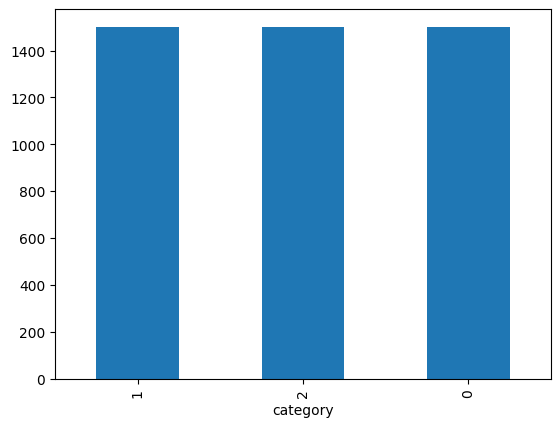

In [40]:
df['category'].value_counts().plot.bar()

In [41]:
from pythainlp.corpus.common import thai_stopwords
thai_stopwords = list(thai_stopwords())

# len(thai_stopwords)
thai_stopwords

['บางกว่า',
 'ทำไร',
 'จัด',
 'รับ',
 'จนทั่ว',
 'เห็นจะ',
 'ขึ้น',
 'นี้',
 'อาจจะ',
 'เป็นเพียง',
 'ทันทีทันใด',
 'คราวหลัง',
 'ด้วยเช่นกัน',
 'ช้าๆ',
 'เพียงใด',
 'จัดแจง',
 'คุณๆ',
 'จัดหา',
 'ยังจะ',
 'เกี่ยวกับ',
 'รวด',
 'ด้วยกัน',
 'ใหญ่ๆ',
 'อัน',
 'นอกจาก',
 'เมื่อไร',
 'เพียงไหน',
 'เร็วๆ',
 'สำคัญ',
 'ครั้งหลัง',
 'เชื่อมั่น',
 'ล่าสุด',
 'ภาย',
 'ทว่า',
 'ยกให้',
 'ดั่งกับว่า',
 'เพียงแต่',
 'เป็นอันมาก',
 'ซะจน',
 'ส่วน',
 'เสร็จ',
 'เท่ากัน',
 'ที่ละ',
 'บัดนี้',
 'จำเป็น',
 'ภายใต้',
 'รวดเร็ว',
 'ถ้า',
 'รวม',
 'ให้ดี',
 'ยอม',
 'คงอยู่',
 'นี้แหล่',
 'อย่างละ',
 'อย่างมาก',
 'เมื่อวันวาน',
 'หาใช่',
 'ทุกเมื่อ',
 'ไม่เป็นไร',
 'นาน',
 'ไป่',
 'หาความ',
 'นอกเหนือ',
 'อื่นๆ',
 'ผิด',
 'บ่อยๆ',
 'ซึ่งๆ',
 'พวกนี้',
 'แค่เพียง',
 'รึว่า',
 'เท่านี้',
 'เป็นอันๆ',
 'เปิด',
 'เป็นต้น',
 'ค่อนข้าง',
 'ซะก่อน',
 'หากแม้น',
 'ต่าง',
 'ดั่งเก่า',
 'กลุ่ม',
 'เชื่อ',
 'นี่แหละ',
 'อะไร',
 'แต่เมื่อ',
 'แม้ว่า',
 'คราวไหน',
 'ตลอดทั้ง',
 'ผู้ใด',
 'แต่อย่างใด',
 'สูงส่ง',
 'ถึงแ

In [42]:
from pythainlp import word_tokenize
def text_process(text):
    # final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ","™","#","/","�","😅","💨","😬","👍🏻","‼️","@","/","<",">","😂","😭","☺️","❤️","😍","%",")","(","*","\"","'",",",".","”","&","^","!","~","-","+","{","}","[","]","?"
    #                                              ,"A","a","B","b","C","c","D","d","E","e","F","f"
    #                                              ,"G","g","H","h","I","i","J","j","K","k","L","l"
    #                                              ,"M","m","N","n","O","o","P","p","Q","q","R","r"
    #                                              ,"S","s","T","t","U","u","V","v","W","w","X","x"
    #                                              ,"Y","y","Z","z","1","2","3","4","5","6","7","8","9","0"
    #                                              ,"=","_","-","$","\"","|","£","¥","®","¯","▽","¼","½","¾"
    #                                              ,"É","×","á","ä","é","ò","ô","ûé"))
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ","™","#","/"))
    final = word_tokenize(final)
    final = " ".join(word for word in final)
    final = " ".join(word for word in final.split() 
                     if word.lower not in thai_stopwords)
    return final
df['text_tokens'] = df['texts'].apply(text_process)
df.to_csv("text_tokent.csv", index=False, encoding='utf-8-sig')
df

,category,texts,text_tokens
0,1,☹️,☹️
1,0,😔,😔
2,0,😞,😞
3,0,😥,😥
4,0,รำ,รำ
...,...,...,...
4495,2,หิววววววว555555,หิว วววววว 555555
4496,2,ให้เพื่อนรับรู้,ให้ เพื่อน รับรู้
4497,2,อยากกิงบัฟเฟ่ต์,อยาก กิงบัฟเฟ่ต์
4498,2,อยากกิน เอ็มเค.,อยาก กิน เอ็ม เค


In [43]:
from sklearn.model_selection import train_test_split
X = df[['text_tokens']]
y = df['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)


In [44]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(analyzer=lambda x:x.split(' '))
cvec.fit_transform(X_train['text_tokens'])
cvec.vocabulary_
# Get the vocabulary
vocabulary = cvec.vocabulary_

# Convert vocabulary to DataFrame
df_vocabulary = pd.DataFrame(list(vocabulary.items()), columns=['Word', 'Index'])

# Save the vocabulary to a CSV file
# df_vocabulary.to_csv("vocabulary.csv", index=False, encoding='utf-8-sig')
df_vocabulary

,Word,Index
0,มั่ว,1216
1,แระ,2419
2,อยาก,1794
3,อะ,1816
4,เ,1936
...,...,...
2789,😙,2720
2790,✌🏻,2647
2791,สมูท,1561
2792,💃🏻🕺🏻,2669


In [45]:
train_bow = cvec.transform(X_train['text_tokens'])
pd.DataFrame(train_bow.toarray(), columns=cvec.get_feature_names_out(), index=X_train['text_tokens'])
dt = pd.DataFrame(train_bow.toarray(), columns=cvec.get_feature_names_out(), index=X_train['text_tokens'])
dt

,,%,%😱😱,&,',(สิ่),),*,****,+,...,🤤🤤🤤,🤤🤤🤤🤤,🤤🤤🤤🤤🤤🤤,🤥,🤦🏻‍♀️,🤩🤩,🤪,🤬😡,🤭,🤭🤦‍♀️
text_tokens,,,,,,,,,,,,,,,,,,,,,
มั่ว แระ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
อยาก อะ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
เ เค ป แป ป,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ไป ค่ะ พี่,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
etude ค่า,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
แปะ ไว้ ก่อน นะ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
แจกัน 💃🏻🕺🏻,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ทำไม อะ ไหนว่า ทุก สาขา,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
import pandas as pd

texts = []
labels = []
dat = {'text': [], 'sentiment': []}

with open("./New folder/test2.txt", 'r', encoding='utf-8') as file1:
    data1 = file1.readlines()
    dat['text'] = [line.strip() for line in data1]

with open("./New folder/test2_labels.txt", 'r', encoding='utf-8') as file2:
    data2 = file2.readlines()
    dat['sentiment'] = [line.strip() for line in data2]

test_df = pd.DataFrame({'category': dat['sentiment'], 'texts': dat['text']})
label_mapping = {'neu': 1, 'neg': 0, 'pos': 2}
test_df['category'] = test_df['category'].map(label_mapping)


test_df



,category,texts
0,0.0,☹️
1,0.0,😔
2,0.0,😞
3,0.0,😥
4,0.0,รำ
...,...,...
175,2.0,เทอๆ
176,2.0,ปร้ะ
177,2.0,ป่ะ​
178,2.0,ป่ะๆ


In [69]:
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# Tokenize the text
tokenizer = Tokenizer()
tokenizer1 = Tokenizer()
tokenizer.fit_on_texts(df['text_tokens'])
tokenizer1.fit_on_texts(test_df['texts'])
X = tokenizer.texts_to_sequences(df['text_tokens'])
X_test = tokenizer1.texts_to_sequences(test_df['texts'])
X = pad_sequences(X)
X_test = pad_sequences(X_test)


y = df['category']
y_test = test_df['category']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=50,stratify=y)

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.5, recurrent_dropout=0.5))  # ลดจำนวน unit ใน LSTM
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # Change loss function

# Train the model

model.fit(X, y, epochs=100, batch_size=256, validation_data=(X_test, y_test))

# # Predictions on the test set
test_predictions = model.predict(X_test)

# Convert the probabilities to class labels
test_predictions_classes = np.argmax(test_predictions, axis=1)

# Print classification report
print(classification_report(y_test, test_predictions_classes))


Epoch 1/100
11/11 [==============================] - 3s 151ms/step - loss: 1.0692 - accuracy: 0.3881 - val_loss: 1.0297 - val_accuracy: 0.4800
Epoch 2/100
11/11 [==============================] - 1s 132ms/step - loss: 0.9816 - accuracy: 0.5959 - val_loss: 0.9054 - val_accuracy: 0.6556
Epoch 3/100
11/11 [==============================] - 1s 132ms/step - loss: 0.8218 - accuracy: 0.6485 - val_loss: 0.7741 - val_accuracy: 0.6261
Epoch 4/100
11/11 [==============================] - 1s 131ms/step - loss: 0.7497 - accuracy: 0.6567 - val_loss: 0.7075 - val_accuracy: 0.6728
Epoch 5/100
11/11 [==============================] - 1s 129ms/step - loss: 0.6705 - accuracy: 0.7185 - val_loss: 0.6835 - val_accuracy: 0.6889
Epoch 6/100
11/11 [==============================] - 1s 127ms/step - loss: 0.6071 - accuracy: 0.7652 - val_loss: 0.6532 - val_accuracy: 0.7072
Epoch 7/100
11/11 [==============================] - 1s 133ms/step - loss: 0.5482 - accuracy: 0.7978 - val_loss: 0.6374 - val_accuracy: 0.7106

KeyboardInterrupt: 

In [58]:

test_predictions_classes = np.argmax(test_predictions, axis=1)

# Print classification report
print(classification_report(y_test, test_predictions_classes))

              precision    recall  f1-score   support

           0       0.92      0.82      0.86       600
           1       0.63      0.72      0.67       600
           2       0.67      0.64      0.65       600

    accuracy                           0.73      1800
   macro avg       0.74      0.73      0.73      1800
weighted avg       0.74      0.73      0.73      1800

